In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
cd /gdrive/My\ Drive/

/gdrive/My Drive


In [0]:
import pandas as pd
import numpy as np
import pylab as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D, MaxPooling1D, Flatten , BatchNormalization , ReLU
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras as K

Using TensorFlow backend.


In [0]:
def conf_plotter(y_true, y_pred, classes,
                      normalize=0,
                      title=None,
                      cmap=plt.cm.pink_r,
                      mode = 'train',
                      save = 0,
                      name = 'conf.jpg'):

    if not title:
        if mode == 'train':
            title = 'Normalized confusion matrix on train dataset'
        else:
            title = 'Normalized confusion matrix on test dataset'
            

    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax ,fraction=0.046, pad=0.04)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           xlabel='Predicted label',
           ylabel='True label')
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ):
                    
        item.set_fontsize(20)
     
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        
        item.set_fontsize(12)

        
                
    plt.gca().invert_yaxis()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if save == 1:
        plt.savefig(name)
    return ax

In [0]:
data = pd.read_csv('./data/Features_train4.csv')

In [0]:
X = df.drop('target' ,1)
X = X.drop('Unnamed: 0',1)


y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
X_train.head()

,flux_min,flux_max,flux_mean,flux_median,flux_std,flux_skew,flux_err_min,flux_err_max,flux_err_mean,flux_err_median,flux_err_std,flux_err_skew,detected_mean,flux_ratio_sq_sum,flux_ratio_sq_skew,flux_by_flux_ratio_sq_sum,flux_by_flux_ratio_sq_skew,flux_w_mean,flux_diff1,flux_diff2,flux_diff3,"0__fft_coefficient__coeff_0__attr_""abs""","0__fft_coefficient__coeff_1__attr_""abs""",0__kurtosis,0__skewness,"1__fft_coefficient__coeff_0__attr_""abs""","1__fft_coefficient__coeff_1__attr_""abs""",1__kurtosis,1__skewness,"2__fft_coefficient__coeff_0__attr_""abs""","2__fft_coefficient__coeff_1__attr_""abs""",2__kurtosis,2__skewness,"3__fft_coefficient__coeff_0__attr_""abs""","3__fft_coefficient__coeff_1__attr_""abs""",3__kurtosis,3__skewness,"4__fft_coefficient__coeff_0__attr_""abs""","4__fft_coefficient__coeff_1__attr_""abs""",4__kurtosis,...,__freq_signif_ratio_21___2_,__freq_signif_ratio_21___3_,__freq_signif_ratio_21___4_,__freq_signif_ratio_21___5_,__freq_signif_ratio_31___0_,__freq_signif_ratio_31___1_,__freq_signif_ratio_31___2_,__freq_signif_ratio_31___3_,__freq_signif_ratio_31___4_,__freq_signif_ratio_31___5_,__freq_varrat___0_,__freq_varrat___1_,__freq_varrat___2_,__freq_varrat___3_,__freq_varrat___4_,__freq_varrat___5_,__freq_y_offset___0_,__freq_y_offset___1_,__freq_y_offset___2_,__freq_y_offset___3_,__freq_y_offset___4_,__freq_y_offset___5_,time_score,phase_score,ddf_bool,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
3142,0.999518,0.000513,0.254382,0.584163,0.000348,0.500566,0.002111,1.953305e-05,0.000094,0.001765,0.000028,0.219335,0.230000,0.002637,0.607150,0.423427,0.794889,0.281841,0.000145,0.522498,0.540702,0.000010,0.000000,0.072829,0.544026,0.000067,0.000102,0.238292,0.705124,0.000225,0.000281,0.353401,0.777249,0.000159,0.000191,0.069519,0.604292,0.000614,0.000637,0.095569,...,0.423011,0.713125,0.671420,0.659257,0.526549,0.446278,0.539195,0.687463,0.709204,0.664974,0.876364,0.599403,0.449503,0.081471,0.248672,0.243160,0.224296,0.485048,0.999926,0.466091,0.564670,0.438104,0.803850,0.300852,0.0,0.0,0.341272,0.939813,0.832041,0.496225,1.0,0.064807,0.475067,0.267735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3438,0.999522,0.000401,0.254260,0.584133,0.000182,0.474777,0.002766,1.708378e-05,0.000100,0.002183,0.000024,0.208700,0.125802,0.001244,0.340620,0.423396,0.655382,0.281020,0.000068,0.522494,0.540735,0.000390,0.000163,0.040904,0.552777,0.000298,0.000396,0.197187,0.681010,0.000162,0.000233,0.067372,0.619056,0.000124,0.000170,0.105535,0.650877,0.000128,0.000231,0.073348,...,0.482407,0.720479,0.694003,0.651872,0.560532,0.541420,0.646418,0.722628,0.737486,0.660249,0.697940,0.523714,0.444721,0.454799,0.812657,0.700912,0.261547,0.526316,0.999926,0.472914,0.557677,0.438204,0.700257,0.339619,0.0,0.0,0.118792,0.880956,0.731266,0.364159,1.0,0.175966,0.665921,0.851698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1101,0.999540,0.000321,0.254140,0.584093,0.000011,0.471625,0.000631,1.004257e-06,0.000005,0.000114,0.000003,0.242679,0.017143,0.000086,0.286056,0.423389,0.632546,0.280440,0.000007,0.522619,0.541205,0.000002,0.000002,0.062065,0.492872,0.000024,0.000011,0.106828,0.538449,0.000004,0.000006,0.041643,0.466159,0.000019,0.000023,0.033918,0.520340,0.000072,0.000083,0.026261,...,0.464337,0.701253,0.443112,0.607159,0.484540,0.448724,0.438772,0.567787,0.473089,0.630286,0.662972,0.678980,0.572090,0.454655,0.144208,0.377865,0.224303,0.476947,0.999922,0.462460,0.550681,0.437032,0.455794,0.261640,1.0,0.0,0.126343,0.884270,0.811370,0.411034,0.0,0.000000,0.699887,0.000800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5671,0.999516,0.000364,0.254150,0.584095,0.000063,0.484985,0.003920,1.760178e-05,0.000130,0.002780,0.000032,0.182780,0.009185,0.000019,0.544657,0.423389,0.806399,0.280657,0.000045,0.522796,0.540914,0.000007,0.000004,0.048249,0.453378,0.000021,0.000022,0.074412,0.482592,0.000003,0.000023,0.061257,0.563

In [0]:
y_train = pd.DataFrame(y_train)
y_train.head()

,target
3142,95
3438,15
1101,42
5671,65
1694,90


In [0]:
y_test = pd.DataFrame(y_test)

In [0]:
X_train.to_csv('./data/X_train.csv')
y_train.to_csv('./data/y_train.csv')
X_test.to_csv('./data/X_test.csv')
y_test.to_csv('./data/y_test.csv')

In [0]:
X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
y_test= pd.read_csv('./data/y_test.csv')

In [0]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((5886, 369), (1962, 369), (5886, 2), (1962, 2))

In [0]:
y_train = y_train.drop(columns =['Unnamed: 0'] )
y_test  = y_test.drop(columns =['Unnamed: 0'] )
X_train = X_train.drop(columns =['Unnamed: 0'] )
X_test = X_test.drop(columns =['Unnamed: 0'] )

In [0]:
y_train.head()

,target
0,95
1,15
2,42
3,65
4,90


In [0]:
from sklearn.preprocessing import OneHotEncoder

y_train = OneHotEncoder(categories='auto').fit_transform(y_train[['target']]).toarray()

y_test  = OneHotEncoder(categories='auto').fit_transform(y_test[['target']]).toarray()

y_train.shape , y_test.shape

((5886, 14), (1962, 14))

In [0]:
input_dim = X_train.shape[1]

n_class = y_train[1].shape[0]
print(n_class , input_dim)

14 368


In [0]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(5886, 368, 1) (5886, 14) (1962, 368, 1) (1962, 14)


In [0]:
af = tf.keras.activations.selu


K.backend.clear_session()

model = Sequential()
model.add(Conv1D(input_dim, 8, strides=1))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
#model.add(MaxPooling1D(pool_size=3))

model.add(Conv1D(256, 5, strides=1))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
#model.add(MaxPooling1D(pool_size=3))


model.add(Conv1D(128, 3, strides=1))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))

model.add(MaxPooling1D()) 

model.add(Flatten())


model.add(Dense(128))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.5))


model.add(Dense(64))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))
model.add(Dropout(rate = 0.5))

model.add(Dense(32))
model.add(BatchNormalization(trainable=True))
model.add(Activation(af))

model.add(Dropout(0.5))
model.add(Dense(n_class, activation='softmax'))

In [0]:
model.build(input_shape= (None, 368, 1))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 361, 368)          3312      
_________________________________________________________________
batch_normalization_1 (Batch (None, 361, 368)          1472      
_________________________________________________________________
activation_1 (Activation)    (None, 361, 368)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 357, 256)          471296    
_________________________________________________________________
batch_normalization_2 (Batch (None, 357, 256)          1024      
_________________________________________________________________
activation_2 (Activation)    (None, 357, 256)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 355, 128)         

In [0]:
#sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = K.optimizers.Adam(lr=0.01, decay=1e-3, amsgrad=False)

In [0]:
def wloglos(ytrue , ypred):
    return tf.losses.log_loss( ytrue , ypred ,weights=([[1,  2, 1, 1, 1, 1, 1, 2, 1, 1, 1,  1,  1,  1]]))

In [0]:
model.compile(loss = wloglos , optimizer=adam , metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train,validation_split=0.2 , epochs=20,batch_size=200,verbose=1)

Train on 4708 samples, validate on 1178 samples
Epoch 1/20
4708/4708 [==============================] - 9s 2ms/step - loss: 0.1142 - acc: 0.7120 - val_loss: 0.6903 - val_acc: 0.5857
Epoch 2/20
4708/4708 [==============================] - 7s 1ms/step - loss: 0.0907 - acc: 0.7657 - val_loss: 0.5176 - val_acc: 0.6129
Epoch 3/20
4708/4708 [==============================] - 7s 1ms/step - loss: 0.0783 - acc: 0.8040 - val_loss: 0.4367 - val_acc: 0.6299
Epoch 4/20
4708/4708 [==============================] - 7s 1ms/step - loss: 0.0763 - acc: 0.8056 - val_loss: 0.3603 - val_acc: 0.6553
Epoch 5/20
4708/4708 [==============================] - 7s 1ms/step - loss: 0.0698 - acc: 0.8239 - val_loss: 0.3946 - val_acc: 0.6486
Epoch 6/20
4708/4708 [==============================] - 7s 1ms/step - loss: 0.0668 - acc: 0.8326 - val_loss: 0.3290 - val_acc: 0.6630
Epoch 7/20
4708/4708 [==============================] - 7s 1ms/step - loss: 0.0649 - acc: 0.8364 - val_loss: 0.1628 - val_acc: 0.7496
Epoch 8/20
470

In [0]:
model.fit(X_train,y_train,validation_split=0.2 , epochs=20,batch_size=200,verbose=1)

Train on 4708 samples, validate on 1178 samples
Epoch 1/20
4708/4708 [==============================] - 7s 2ms/step - loss: 0.0444 - acc: 0.8885 - val_loss: 0.1054 - val_acc: 0.8065
Epoch 2/20
4708/4708 [==============================] - 7s 1ms/step - loss: 0.0436 - acc: 0.8902 - val_loss: 0.0914 - val_acc: 0.8107
Epoch 3/20
4708/4708 [==============================] - 7s 1ms/step - loss: 0.0412 - acc: 0.8944 - val_loss: 0.0795 - val_acc: 0.8362
Epoch 4/20
4708/4708 [==============================] - 7s 1ms/step - loss: 0.0405 - acc: 0.8970 - val_loss: 0.0760 - val_acc: 0.8217
Epoch 5/20
4708/4708 [==============================] - 7s 1ms/step - loss: 0.0407 - acc: 0.8951 - val_loss: 0.0812 - val_acc: 0.8251
Epoch 6/20
4708/4708 [==============================] - 7s 1ms/step - loss: 0.0390 - acc: 0.9055 - val_loss: 0.0751 - val_acc: 0.8413
Epoch 7/20
4708/4708 [==============================] - 7s 1ms/step - loss: 0.0381 - acc: 0.9038 - val_loss: 0.1079 - val_acc: 0.8311
Epoch 8/20
470

In [0]:
model.fit(X_train,y_train,epochs=100,batch_size=300,verbose=0)

In [0]:
# evaluate the model
model.evaluate(X_test, y_test)

1962/1962 [==============================] - 1s 695us/step


[0.08202236840666616, 0.8185524973908209]

In [0]:
model.fit(X_train,y_train,epochs=100,batch_size=300,verbose=0)

In [0]:
# evaluate the model
model.evaluate(X_test, y_test, verbose=1)

1962/1962 [==============================] - 0s 122us/step


1.0535353086774868

In [0]:
model.fit(X_train,y_train,epochs=3000,batch_size=300,verbose=0)

In [0]:
path = './NN_models/6'
# serialize model to JSON
model_json = model.to_json()
with open(str(path)+'/model.json', "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights(str(path)+'/model.h5')
print("Saved model to disk")

Saved model to disk


In [0]:
from keras.models import model_from_json

# load json and create model
json_file = open('./NN_models/5/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./NN_models/5/model.h5")
print("Loaded model from disk")

# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

W0818 09:56:13.573389 140153045301120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3217: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Loaded model from disk


In [0]:
predicts = model.predict(X_test)

y_preds = pd.DataFrame(predicts)
y_true = pd.DataFrame(y_test)


def multi_weighted_logloss(y_true, y_preds):
    """
    @author olivier https://www.kaggle.com/ogrellier
    multi logloss for PLAsTiCC challenge
    """
    classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
    class_weight = {6: 1, 15: 2, 16: 1, 42: 1, 52: 1, 53: 1, 62: 1, 64: 2, 65: 1, 67: 1, 88: 1, 90: 1, 92: 1, 95: 1}
    
    
    y_p = y_preds
    
    y_ohe = pd.get_dummies(y_true)
    # Normalize rows and limit y_preds to 1e-15, 1-1e-15
    y_p = np.clip(a=y_p, a_min=1e-15, a_max=1-1e-15)
    # Transform to log
    y_p_log = np.log(y_p)

    
    y_log_ones = np.sum(y_ohe.values * y_p_log, axis=0)
    # Get the number of positives for each class
    nb_pos = y_ohe.sum(axis=0).values.astype(float)
    # Weight average and divide by the number of positives
    class_arr = np.array([class_weight[k] for k in sorted(class_weight.keys())])
    y_w = y_log_ones * class_arr / nb_pos
    
    loss = - np.sum(y_w) / np.sum(class_arr)
    return loss



multi_weighted_logloss(y_true, y_preds)

0.8359763106877193

In [0]:
def mywloss(ytrue,ypred):
    
    wtable = [1,  2, 1, 1, 1, 1, 1, 2, 1, 1, 1,  1,  1,  1]
    yc=tf.clip_by_value(ypred,1e-15,1-1e-15)
    loss=-(tf.reduce_mean(tf.reduce_mean(ytrue*tf.log(yc),axis=0)/wtable))
    return loss

mywloss(y_true, y_preds)

TypeError: ignored

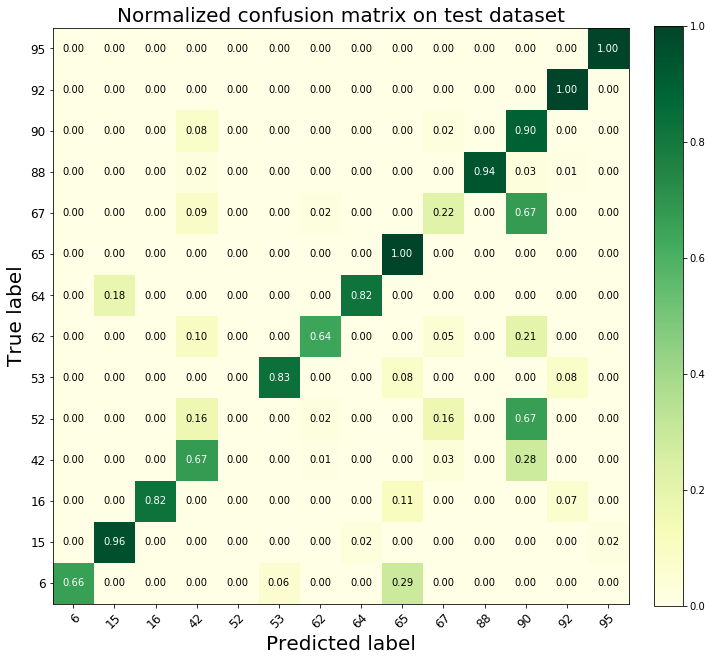

In [0]:
pred = np.array(predicts)
y_t = np.array(y_test)

Y = []
pr= []

for i in range(len(y_test)):
    
    pr.append(np.argmax(pred[i]))
    
    Y.append(np.argmax((y_t[i])))

classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]

labels = [classes[i] for i in range(len(classes))]
conf_plotter(Y , pr , labels , normalize=1, mode='test' , cmap = plt.cm.YlGn, save=0 , name='test_3.jpg')


In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y, pr)
np.trace(cm)/len(y_test)

0.81855249745158

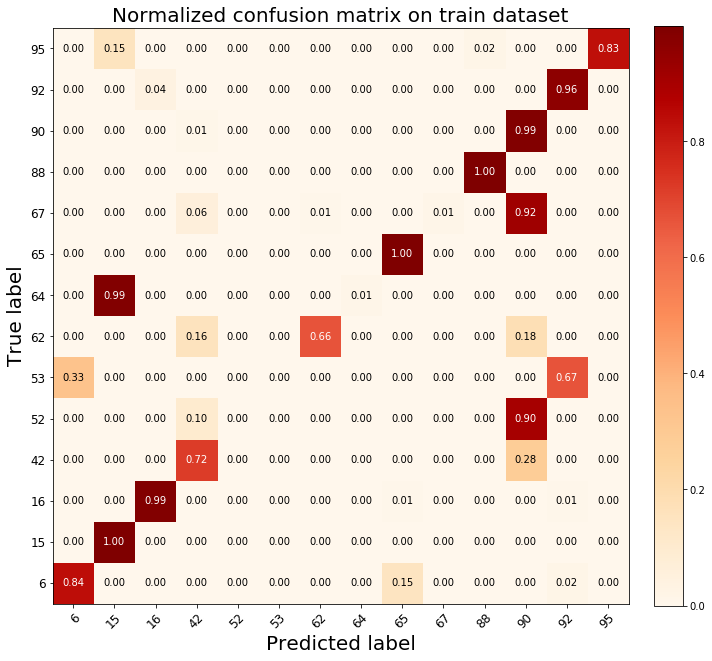

In [0]:
predicts = loaded_model.predict(X_train)

Y = []
pr= []

for i in range(len(y_train)):
    
    pr.append(np.argmax((np.array(predicts)[i])))
    Y.append(np.argmax(np.array(y_train)[i]))


    
conf_plotter(Y , pr , labels , normalize=1, cmap = plt.cm.OrRd, save=1 , name='train_3.jpg')